# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Session-6:-Data-structuring-II)
- [code for plots](#Code-for-plots)

# Session 6: Data structuring II

### The Pandas way

*Andreas Bjerre-Nielsen*

## Recap

*What do we know about explanatory plotting?*

- matplotlib with heavy customization (labels, colors, thickness)
- start from empty canvas and add important stuff
- start with customized plot (e.g. from seaborn) and remove everything unnecessary


*What do we know about exploratory plotting?*

- seaborn has nice plots
- advanced plots for making plot grids


## Motivation
*Reminder: Why do we want to learn data structuring?*

- We have to do it, data is almost never cleaned
- No one can and will do it for us
- Even as a manager of data scientists - we need to know

## Agenda
We will learn about new data types 
1. [string  data](#String-data)
1. [temporal data](#Temporal-data)
1. [categorical data](#Categorical-data)
1. [missing data](#Missing-data) and [duplicates](#Duplicates)

## Loading the software

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# String data

## String operations vectorized (1)
*Quiz: Which operators could work for string?*

Operators `+`, `+=`. Example:

In [6]:
str_ser1 = pd.Series(['Andreas', 'Snorre', 'David'])

In [7]:
str_ser1 + ' works @ SODAS'

0    Andreas works @ SODAS
1     Snorre works @ SODAS
2      David works @ SODAS
dtype: object

## String operations vectorized (2)
Addition also work for two series

In [9]:
# adding two series together is also possible
str_ser2 = pd.Series(['Bjerre-Nielsen', 'Ralund', 'Dreyer Lassen'])
str_ser1 + ' ' + str_ser2 

0    Andreas Bjerre-Nielsen
1             Snorre Ralund
2       David Dreyer Lassen
dtype: object

## String operations vectorized (3)
The powerful .str has several powerful methods e.g. `contains`, `capitalize`. Example:

In [12]:
# str_ser1.str.upper()
str_ser1.str.contains('And')

0     True
1    False
2    False
dtype: bool

## String operations vectorized (4)

The .str methods include slicing - example: 

In [11]:
str_ser2.str[1:4]

0    jer
1    alu
2    rey
dtype: object

## String operations vectorized (5)

Many more `str` methods in pandas,
- most basic strings methods translate directly
- see Table 7-5 in PDA for an overview


# Categorical data

## Categorical data type (1)
*Are string (object) columns smart?*

No, sometimes categorical data type is better:
- use categorical when many characters are repeated
    - less storage and faster computation 
- or to order string data

## Categorical data type (2)
*How do we convert to categorical?*

In [20]:
edu_list = ['B.Sc. Political Science', 'Secondary school'] + ['High school']*2
edu_cats = ['Secondary school', 'High school', 'B.Sc. Political Science']

str_ser3 = pd.Series(edu_list*100000)

# option 1 - order 
cats = pd.Categorical(str_ser3, categories=edu_cats, ordered=True)
cat_ser = pd.Series(cats, index=str_ser3)
cat_ser.values[:5]

# option 2 - no order 
cat_ser2 = str_ser3.astype('category')

## Categorical data type (3)
*How do we work with categorical data?*

- Using the `cat` attribute of series. Has a few methods. E.g. `.cat.codes`

In [21]:
print(cat_ser.cat.codes)

B.Sc. Political Science    2
Secondary school           0
High school                1
High school                1
dtype: int8


## Categorical data type (4)

Often we want to our string / categorical data as dummy variables
- each category value has a dummy column (0 or 1)
- dummy columns can be made with `to_dummies`

## Categorical data type (5)
*Can we convert our numerical data to bins in a smart way?*

Yes, two methods are useful (we already saw `cut`): 
- `cut` which divides data by user specified bins
- `qcut` which divides data by user specified quantiles 
    - e.g. median, $q=0.5$; lower quartile threshold, $q=0.25$.

In [34]:
x = pd.Series(np.random.normal(size=10**7))
cat_ser3 = pd.qcut(x, q=[0,.025,.975,1])
cat_ser3.cat.categories

IntervalIndex([(-5.492, -1.96], (-1.96, 1.96], (1.96, 5.18]],
              closed='right',
              dtype='interval[float64]')

# Temporal data

## Temporal data type (1)

*Why is time so fundamental?*


Every measurement made by humans was made at a point in time, therefore it has a "timestamp".

## Temporal data type (2)
*How are timestamps  measured?*

1. **Datetime** (ISO 8601): standard calendar 
  - year, month, day: minute, second, miliseconds etc. [timezone]
  - can come as string in raw data
2. **Epoch time**: seconds since January 1, 1970 - 00:00, GMT.
  - nanoseconds in pandas

## Temporal data type (3)

*Does Pandas store it in a smart way?*


Pandas has native support for temporal data combining datetime and epoch time. 

In [22]:
str_ser4 = pd.Series(['20170101', '20170727', '20170803', '20171224'])
dt_ser1 = pd.to_datetime(str_ser4)
print(dt_ser1.astype('int64'))

0    1483228800000000000
1    1501113600000000000
2    1501718400000000000
3    1514073600000000000
dtype: int64


## Temporal data type (4)

*How does the input type matter for how datatime is parsed?*


In [24]:
# print(pd.to_datetime(['20170101', '20170102']))
print(pd.to_datetime([20170101, 20170102]))

DatetimeIndex(['1970-01-01 00:00:00.020170101', '1970-01-01 00:00:00.020170102'], dtype='datetime64[ns]', freq=None)


## Time series (1)
*Why is temporal data powerful?*

We can easily make and plot time series. Almost 20 years of Apple stock price
- tip install in terminal using: `conda install pandas-datareader`

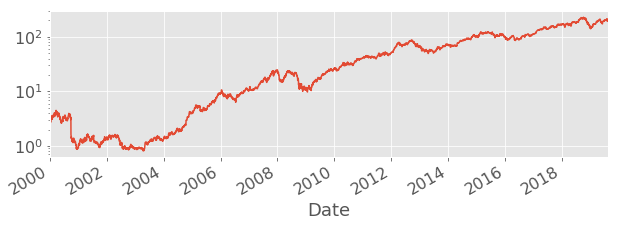

In [25]:
from pandas_datareader import data
aapl = data.DataReader("aapl", data_source='yahoo', start='2000')['Adj Close']
aapl.plot(figsize=(10,3), logy=True)

## Time series (2)
*What is within the `aapl` series? What is a time series?*

In [27]:
aapl.head().index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07'],
              dtype='datetime64[ns]', name='Date', freq=None)

Time series is normally data with time index.

## Time series (3)
*Why is pandas good at time data?*

It handles irregular data well: 
- missing values;
- duplicate entries. 

It has specific tools for resampling and interpolating data
- See 11.3, 11.5, 11.6 in PDA book. 

## Datetime variables (1)
*What other uses might time data have?*

We can extract data from datetime columns. These columns have the `dt` attribute and its sub-methods. Example:

In [38]:
dt_ser2 = pd.Series(aapl.index)

dt_ser2.dt.day.loc[:7]
# dt_ser2.dt.day.iloc[500:505]
# dt_ser2.dt.year.head(3)


0     3
1     4
2     5
3     6
4     7
5    10
6    11
7    12
Name: Date, dtype: int64

## Datetime variables (2)
The `dt` sub-methods include `year`,  `weekday`, `hour`, `second`.

*To note:* Your temporal data may need conversion. `dt` includes `tz_localize` and `tz_convert` which does that. 

## Datetime variables (3)
*Quiz: What are you to do if get time data with numbers of around 1-2 billion?*

It is likely to be epoch time measured in seconds. We can convert it as follows:

In [39]:
pd.to_datetime([123512321, 1532321321], unit='s')

DatetimeIndex(['1973-11-30 12:58:41', '2018-07-23 04:48:41'], dtype='datetime64[ns]', freq=None)

..

# Missing data

## Missing data type (1)
*Which data type have we not covered yet?*

Missing data, i.e. empty observations.
- In python: `None`
- In pandas:  numpy's 'Not a Number', abbreviated `NaN` or `nan`

## Missing data type (2)
*What does a DataFrame with missing data look like?*

In [49]:
nan_data = [[1,np.nan,3],
            [4,5,None],
            [7,8,9]]

nan_df = pd.DataFrame(nan_data, columns=['A', 'B', "C"])

print(nan_df.isnull())

       A      B      C
0  False   True  False
1  False  False   True
2  False  False  False


## Handling missing data
*What options do we in working with missing data?*

1. Ignore the problem
2. Drop missing data: columns and/or rows
3. Fill in the blanks
4. If time and money permits: collect the data or new data

## Removing missing data 
*How do we remove data?*

Using the `dropna` method.

In [55]:
print(nan_df)
print()
print(nan_df.dropna(axis=0,subset=['B'])) # subset=['B'], axis=1

   A    B    C
0  1  NaN  3.0
1  4  5.0  NaN
2  7  8.0  9.0

   A    B    C
1  4  5.0  NaN
2  7  8.0  9.0


## Filling missing data (1)
*How do we fill observations with a constant?*

In [56]:
# print(nan_df.fillna(100)) # fill all
# print(nan_df)

   A      B      C
0  1  100.0    3.0
1  4    5.0  100.0
2  7    8.0    9.0


Note: we can also select missing `isnull` and the replace values using `loc`.

## Filling missing data (2)
*Are there other methods?*


Yes, many methods:
- Filling sorted temporal data, see `ffill`, `bfill`
- Filling with a model 
    - e.g. linear interpolation, by mean of nearest observations etc.
    - `sklearn` in next week can impute data

# Duplicates 

## Duplicates in data (1)
*What does it mean there are duplicates in the data?*

- More than one entry where the should be only one.

- If for a certain set of variables the combination is repeated.

## Duplicates in data (2)
*How do we drop duplicates?*

In [59]:
# print(str_ser3.duplicated())
print(str_ser3.drop_duplicates())

0    B.Sc. Political Science
1           Secondary school
2                High school
dtype: object


# More datatypes

- Spatial data with `geopandas` (GeoSeries, GeoDataFrame)
    - Has methods for working with shapes
- You can define your own 
    - e.g. price, temperature, energy (change currency, measure etc.)    
- What we do not cover: networks

# The end

[Return to agenda](#Agenda)

# Code for plots
### Load software

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title